In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# DATA PREPROCESSING
import numpy as np
from citylearn.data import DataSet

dataset_name = 'citylearn_challenge_2023_phase_3_3'

schema = DataSet.get_schema(dataset_name)
random_seed = 42
np.random.seed(random_seed)

buildings = list(schema['buildings'].keys())
buildings = np.random.choice(buildings, size=2, replace=False).tolist()

print("Active buuldings in the schema: ")
for building in schema['buildings']:
    if building in buildings:
        schema['buildings'][building]['include'] = True
        print(building)
    else:
        schema['buildings'][building]['include'] = False


print("\n\nActive observations in the schema: ")
active_observations = 'all'
for observation in schema['observations']:
    if active_observations == 'all':
        schema['observations'][observation]['active'] = True
        schema['observations'][observation]['shared_in_central_agent'] = True
        print(observation)
    else:
        if observation in active_observations:
            schema['observations'][observation]['active'] = True
            schema['observations'][observation]['shared_in_central_agent'] = True
            print(observation)
        else:
            schema['observations'][observation]['active'] = False
            schema['observations'][observation]['shared_in_central_agent'] = False

print("\n\nActive actions in the schema: ")
for action in schema['actions']:
    if schema['actions'][action]['active']:
        print(action)

# active_actions = 'all'
# for action in schema['actions']:
#     if active_actions == 'all':
#         schema['actions'][action]['active'] = True
#         print(action)
#     else:
#         if action in active_actions:
#             schema['actions'][action]['active'] = True
#             print(action)
#         else:
#             schema['actions'][action]['active'] = False

schema['simulation_start_time_step'] = 1
lenght_of_simulation_in_days = 7
schema['simulation_end_time_step'] = lenght_of_simulation_in_days * 24

schema['reward_function']['type'] = "citylearn.reward_function.ComfortReward"

print("\n\nReward function: ")
print(schema['reward_function']['type'])
number_of_episodes = 3

Active buuldings in the schema: 
Building_1
Building_2


Active observations in the schema: 
month
day_type
hour
daylight_savings_status
outdoor_dry_bulb_temperature
outdoor_dry_bulb_temperature_predicted_6h
outdoor_dry_bulb_temperature_predicted_12h
outdoor_dry_bulb_temperature_predicted_24h
outdoor_relative_humidity
outdoor_relative_humidity_predicted_6h
outdoor_relative_humidity_predicted_12h
outdoor_relative_humidity_predicted_24h
diffuse_solar_irradiance
diffuse_solar_irradiance_predicted_6h
diffuse_solar_irradiance_predicted_12h
diffuse_solar_irradiance_predicted_24h
direct_solar_irradiance
direct_solar_irradiance_predicted_6h
direct_solar_irradiance_predicted_12h
direct_solar_irradiance_predicted_24h
carbon_intensity
indoor_dry_bulb_temperature
average_unmet_cooling_setpoint_difference
indoor_relative_humidity
non_shiftable_load
solar_generation
cooling_storage_soc
heating_storage_soc
dhw_storage_soc
electrical_storage_soc
net_electricity_consumption
electricity_pricing
electric

In [11]:
from stable_baselines3.dqn import DQN

%reload_ext autoreload
import citylearn
import importlib
importlib.reload(citylearn)

from citylearn.citylearn import CityLearnEnv
from citylearn.wrappers import NormalizedObservationWrapper, StableBaselines3Wrapper
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from helpers.custom_callback import CustomCallback
from wrappers.DQNActionWrapper import DQNActionWrapper

dqn_env = CityLearnEnv(schema, central_agent=True)
dqn_env = NormalizedObservationWrapper(dqn_env)
dqn_env = StableBaselines3Wrapper(dqn_env)

action_bins = {'electrical_storage': 3, 'dhw_storage': 3, 'cooling_device': 3}
action_bin_sizes = []
for b in dqn_env.buildings:
    action_bin_sizes.append(action_bins)

dqn_env = DQNActionWrapper(dqn_env, action_bin_sizes)

total_timesteps = number_of_episodes * (dqn_env.time_steps - 1)

dqn_model = DQN("MlpPolicy", dqn_env, verbose=1, seed=random_seed, learning_starts=total_timesteps/5)

dqn_callback = CustomCallback(env=dqn_env, total_timesteps=total_timesteps)
dqn_model.learn(total_timesteps=total_timesteps, progress_bar=True, callback=dqn_callback)

observations = dqn_env.reset()

while not dqn_env.done:
    actions, _ = dqn_model.predict(observations, deterministic=True)
    observations, _, _, _ = dqn_env.step(actions) 

# print cost functions at the end of episode
kpis = dqn_env.evaluate()
kpis = kpis.pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)

Output()

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

random action

name,Building_1,Building_2,District
cost_function,,,
annual_normalized_unserved_energy_total,0.000000,0.000000,0.000000
annual_peak_average,NaN,NaN,1.922064
carbon_emissions_total,2.372058,4.705404,3.538731
cost_total,2.337100,4.526138,3.431619
daily_one_minus_load_factor_average,NaN,NaN,0.846158
daily_peak_average,NaN,NaN,1.939502
discomfort_delta_average,-7.654192,-6.193148,-6.923670
discomfort_delta_maximum,0.118439,0.000000,0.059219
discomfort_delta_minimum,-15.350341,-14.697454,-15.023898


In [5]:
from stable_baselines3.dqn import DQN
from citylearn.citylearn import CityLearnEnv
from citylearn.wrappers import NormalizedObservationWrapper, StableBaselines3Wrapper
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from helpers.custom_callback import CustomCallback
from wrappers.DQNActionWrapper import DQNActionWrapper
from itertools import product

dqn_env = CityLearnEnv(schema, central_agent=True)
dqn_env = NormalizedObservationWrapper(dqn_env)
dqn_env = StableBaselines3Wrapper(dqn_env)

action_bins = {'electrical_storage': 7, 'dhw_storage': 7, 'cooling_device': 7}
action_bin_sizes = []
for b in dqn_env.buildings:
    action_bin_sizes.append(action_bins)

dqn_env = DQNActionWrapper(dqn_env, action_bin_sizes)

hyperparameters = {
    'gamma': [0.99, 0.95, 0.90],
    # 'buffer_size': [10000, 50000, 100000],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'exploration_initial_eps': [1, 0.5, 0.1],
    'exploration_final_eps': [0.1, 0.01, 0.001]
}


# Initialize lists to store results
results = []
count = 0
iterations = len(list(product(*hyperparameters.values())))
print(f"Total number of iterations: {iterations}")

# Loop through combinations of hyperparameters
for param_values in product(*hyperparameters.values()):
    kwargs = {param_name: param_value for param_name, param_value in zip(hyperparameters.keys(), param_values)}
    # Initialize the SAC model with current hyperparameters
    dqn_model = DQN("MlpPolicy", dqn_env, seed=random_seed, learning_starts=0, **kwargs)

    # Calculate total timesteps
    total_timesteps = number_of_episodes * (dqn_env.time_steps - 1)
    
    # Initialize callback
    dqn_callback = CustomCallback(dqn_env, total_timesteps=total_timesteps)

    # Train the SAC model
    dqn_model.learn(total_timesteps=total_timesteps, callback=dqn_callback)

    observations = dqn_env.reset()

    while not dqn_env.done:
        actions, _ = dqn_model.predict(observations, deterministic=True)
        observations, _, _, _ = dqn_env.step(actions)

    # Evaluate the model and store results
    kpis = dqn_env.evaluate()
    kpis = kpis.pivot(index='cost_function', columns='name', values='value')
    kpis = kpis.dropna(how='all')
    results.append({
        'hyperparameters': kwargs,
        'callback': dqn_callback,
        'kpis': kpis
    })

    count += 1
    print(count)

Total number of iterations: 81
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


MemoryError: Unable to allocate 191. MiB for an array with shape (1000000, 1, 50) and data type float32

[None]

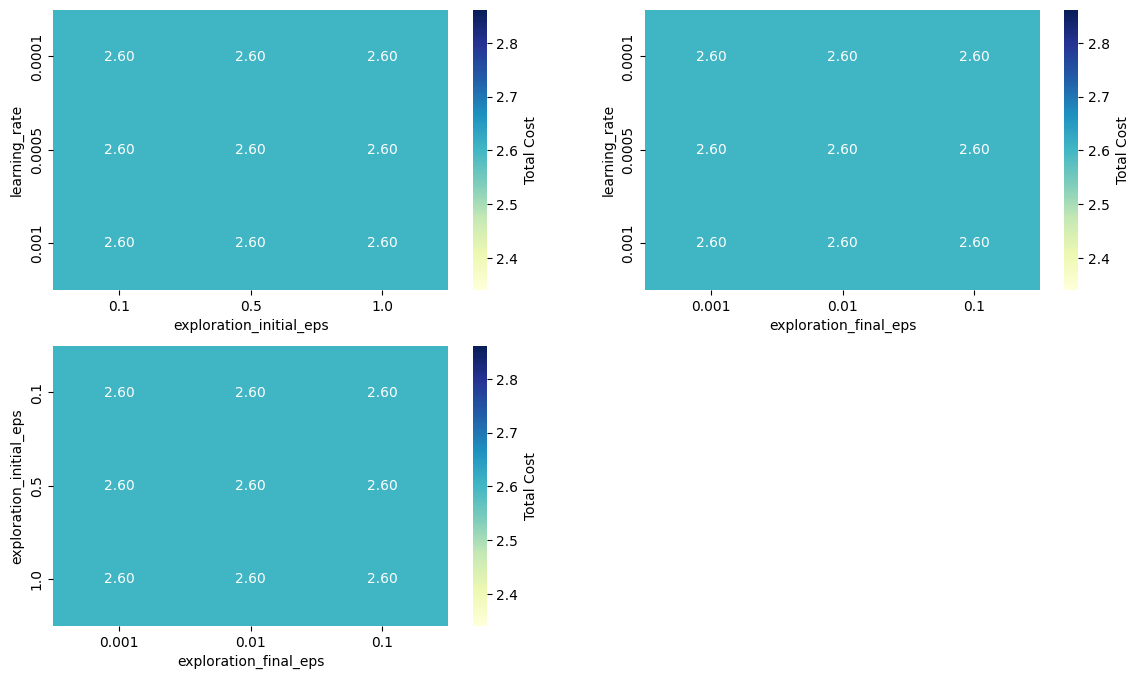

In [41]:
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

param_combinations = list(combinations(hyperparameters, 2))

num_subplots = len(param_combinations)
num_cols = min(num_subplots, 2)
num_rows = (num_subplots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 8))

for ax, param_combination in zip(axes.flatten(), param_combinations):
    max_index = min(range(len(results)), key=lambda i: results[i]['kpis'].loc['cost_total'][-1])

    # Access the gamma value of the hyperparameters at max_index
    set_params = results[max_index]['hyperparameters']
    set_params = {key: value for key, value in set_params.items() if key not in param_combination}

    filtered_results = [item for item in results if all(item['hyperparameters'][key] == value for key, value in set_params.items())]

    param1, param2 = param_combination
    # Prepare data for heatmap
    data = {
        param1: [],
        param2: [],
        'Total Cost': []
    }

    for result in filtered_results:
        param1_value = result['hyperparameters'][param1]
        param2_value = result['hyperparameters'][param2]
        total_cost = result['kpis'].loc['cost_total'].iloc[-1]  # Get the final total cost value
        data[param1].append(param1_value)
        data[param2].append(param2_value)
        data['Total Cost'].append(total_cost)

    # Create DataFrame from the data
    df = pd.DataFrame(data)

    # Aggregate the data (e.g., using mean total cost) for each unique combination of learning rate and discount factor
    agg_df = df.groupby([param1, param2]).mean().reset_index()

    # Pivot the DataFrame to create the heatmap
    heatmap_data = agg_df.pivot(param1, param2, 'Total Cost')

    # Create the heatmap
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Total Cost'}, ax=ax)
    ax.set_xlabel(param2)
    ax.set_ylabel(param1)

# delete empty subplots
[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]